In [2]:
import numpy as np
import scipy as sp
import cv2
import matplotlib.pyplot as plt

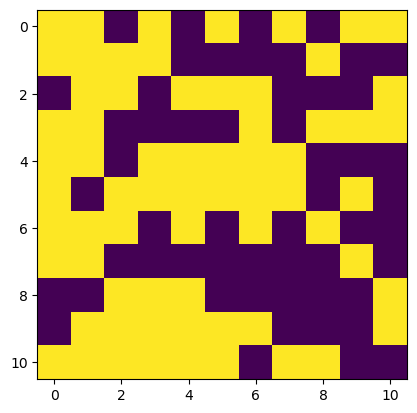

In [3]:
x_bound = 11
y_bound = 11

genetic_representation = np.random.choice([0, 1], size=(x_bound, y_bound))
plt.imshow(genetic_representation)

In [8]:
hash(genetic_representation.data.tobytes())

-4268264329327945077

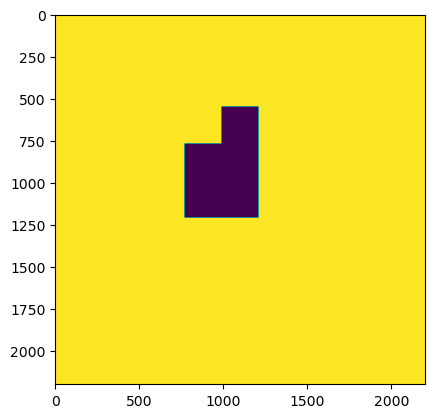

In [ ]:
upscaled_image = sp.ndimage.zoom(genetic_representation, 200, order=0)
plt.imshow(upscaled_image)

In [ ]:
# add padding zeros
padding = 100
upscaled_image = np.pad(upscaled_image, [(padding, padding), (padding, padding)], mode='constant')

True

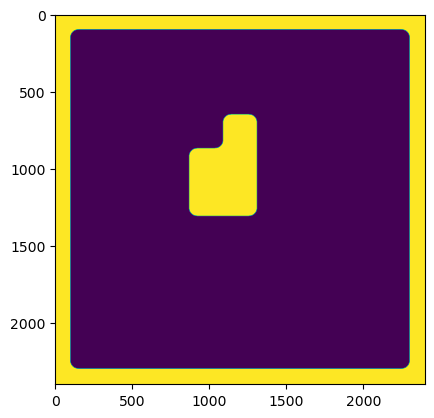

In [ ]:
# use this to cut extrude
inverted_image = np.logical_not(upscaled_image)

# make integer value for cv2
upscaled_image_uint8 = (inverted_image * 255).astype(np.uint8)

# calculate the kernel size to achieve the desired fillet radius
fillet_radius = 11 # radius in nm
image_size = np.size(upscaled_image_uint8[0]) # number of pixels on one side of the image
substrate_size = 500 # nm, the sidelength of our simulation boundaries

pixel_per_nm = image_size/substrate_size
kernel_size = int(2*fillet_radius*pixel_per_nm)


# create the structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size,kernel_size))

# dilate and then erode the image
rounded_image = cv2.morphologyEx(upscaled_image_uint8, cv2.MORPH_OPEN, kernel)
rounded_image = cv2.morphologyEx(rounded_image, cv2.MORPH_CLOSE, kernel)
plt.imshow(rounded_image)
cv2.imwrite('rounded_image.png', rounded_image)

In [ ]:
# rounded_image = np.logical_not(rounded_image)
ret, threshold = cv2.threshold(cv2.bitwise_not(rounded_image), 127, 255, 0)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)


In [ ]:
output_contours = []
for contour in contours:
    output_contour = [[int(point[0][0]), int(point[0][1])] for point in contour]
    output_contours.append(output_contour)

In [ ]:
contours[1]

array([[[1141,  650]],

       [[1142,  649]],

       [[1143,  649]],

       ...,

       [[1138,  650]],

       [[1139,  650]],

       [[1140,  650]]], dtype=int32)

In [ ]:
output_string = ""
for contour in output_contours:
    for point in contour:
        output_string += "{" + str(point[0]) + ".0, " + str(point[1]) + ".0}, "
# Remove last comma and space
output_string = output_string[:-2]
java_string = "new double[][]{{" + output_string + "}};"
java_string


'new double[][]{{{152.0, 100.0}, {151.0, 101.0}, {150.0, 101.0}, {149.0, 101.0}, {148.0, 101.0}, {147.0, 101.0}, {146.0, 101.0}, {145.0, 101.0}, {144.0, 101.0}, {143.0, 101.0}, {142.0, 101.0}, {141.0, 102.0}, {140.0, 102.0}, {139.0, 102.0}, {138.0, 102.0}, {137.0, 103.0}, {136.0, 103.0}, {135.0, 103.0}, {134.0, 104.0}, {133.0, 104.0}, {132.0, 104.0}, {131.0, 105.0}, {130.0, 105.0}, {129.0, 106.0}, {128.0, 106.0}, {127.0, 107.0}, {126.0, 107.0}, {125.0, 108.0}, {124.0, 108.0}, {123.0, 109.0}, {122.0, 110.0}, {121.0, 110.0}, {120.0, 111.0}, {119.0, 112.0}, {118.0, 113.0}, {117.0, 114.0}, {116.0, 115.0}, {115.0, 115.0}, {114.0, 116.0}, {114.0, 117.0}, {113.0, 118.0}, {112.0, 119.0}, {111.0, 120.0}, {110.0, 121.0}, {110.0, 122.0}, {109.0, 123.0}, {108.0, 124.0}, {108.0, 125.0}, {107.0, 126.0}, {106.0, 127.0}, {106.0, 128.0}, {105.0, 129.0}, {105.0, 130.0}, {104.0, 131.0}, {104.0, 132.0}, {104.0, 133.0}, {103.0, 134.0}, {103.0, 135.0}, {103.0, 136.0}, {102.0, 137.0}, {102.0, 138.0}, {102.0,

In [ ]:
# simple two column list of coordinates
with open('contour.txt', 'w') as f:
    for contour in output_contours:
        for point in contour:
            f.write(str(point[0]) + ' ' + str(point[1]) + '\n')

In [ ]:
filename = 'contour.txt'
contours = output_contours
with open(filename, 'w') as f:
    f.write("%Coordinates\n")
    total_points = 0
    for contour in contours:
        for point in contour:
            f.write(f"{point[0]} {point[1]}\n")
            total_points += 1

    f.write("\n%Elements\n")
    start_point = 1
    for contour in contours:
        contour_len = len(contour)
        for i in range(start_point, start_point + contour_len - 1):
            # connect each point with the next within the same contour
            f.write(f"{i} {i+1}\n")
        # connect the last point with the first of the same contour
        f.write(f"{start_point + contour_len - 1} {start_point}\n")
        start_point += contour_len